# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position
- memory usage
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - also modelling the acceleration of the mouse, we can account for the time it "would" take in real time to travel a path 

In [1]:
import os
import glob
from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.utilities.Utils import Utils

In [2]:
maze = Utils.load_maze('mazes/competition_json/AAMC16Maze.json')

In [3]:
flood = FloodFill(walls=maze)
path = flood.get_path_from_flood_map()
print(flood.get_stats())
print(flood.get_path())

(70, 24)
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 3), (2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (5, 2), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (14, 5), (13, 5), (12, 5), (11, 5), (11, 6), (12, 6), (13, 6), (13, 7), (12, 7), (11, 7), (10, 7), (9, 7), (9, 6), (9, 5), (8, 5), (7, 5), (6, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10), (6, 9), (7, 9), (7, 8)]


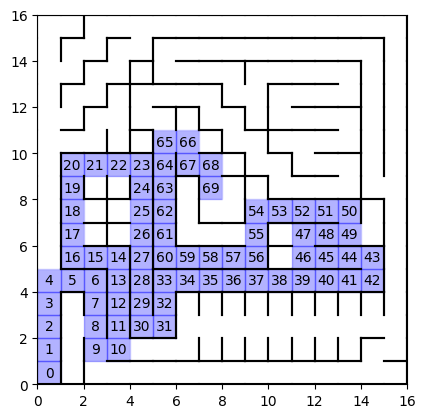

In [4]:
Utils().draw_maze(walls=maze, path=flood.get_path())